### Подключение библиотек

In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

### Загрузка датасета

In [63]:
df = pd.read_csv('UniversalBank.csv')
df.head(5)

,Row,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


### Удаление лишних столбцов

In [64]:
df = df.drop(columns=['Row', 'ZIP Code'])

In [65]:
df.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


### Разделение данных на признаки и целевую переменную

In [66]:
X = df.drop(columns=['Personal Loan'])
y = df['Personal Loan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=73, stratify=y)

### Построение дерева решений

In [67]:
dt = DecisionTreeClassifier(max_depth=3, random_state=73, criterion='entropy')
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=73)

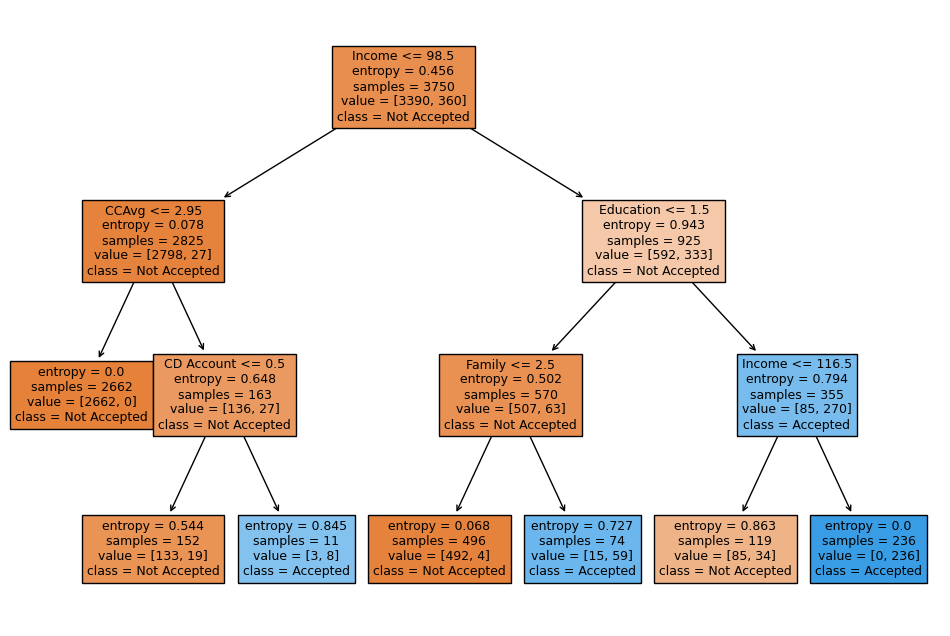

In [68]:
plt.figure(figsize=(12,8))
plot_tree(dt, filled=True, class_names=['Not Accepted', 'Accepted'], feature_names=list(X_train.columns))
plt.show()

### Набор данных mushrooms

### Загрузка пакетов

In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

### Загрузка датасета

In [70]:
data = pd.read_csv('mushrooms.csv')
data.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [71]:
data.shape

(8124, 23)

### Создание численных переменных OneHotEncoding

In [72]:
data_encoded = pd.get_dummies(data, drop_first=True)
data_encoded.head(5)

,class_p,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,True,False,False,False,False,True,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
1,False,False,False,False,False,True,False,True,False,False,...,True,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,True,False,False,False
3,True,False,False,False,False,True,False,False,True,False,...,False,True,False,False,False,False,False,False,True,False
4,False,False,False,False,False,True,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False


### Разделение датасета на признаки и целевую переменную

In [73]:
X = data_encoded.drop('class_p', axis=1)
y = data_encoded['class_p']
X.shape

(8124, 95)

### Разделение данных на тренировочные и тестовые

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=73, stratify=y)

### Строим модель на основе DT

In [75]:
dt_model = DecisionTreeClassifier(max_depth=5, random_state=73)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=73)

### Построение матрицы ошибок

In [76]:
y_pred_test = dt_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)
print(conf_matrix)

[[1052    0]
 [   1  978]]


### Визуализация матрицы ошибок

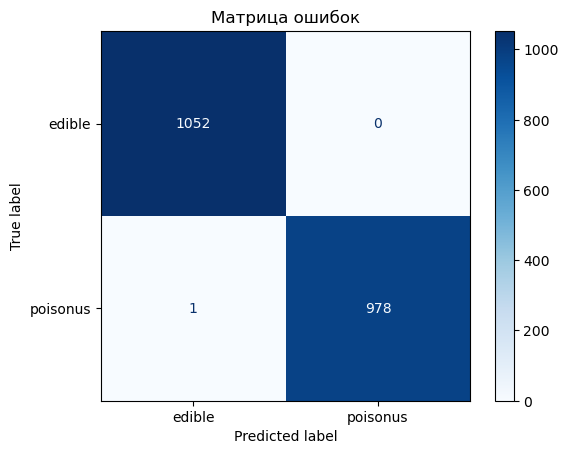

In [77]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['edible', 'poisonus'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Матрица ошибок')
plt.show()

### Оценка точности предсказания для набора train

In [78]:
y_pred_train = dt_model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f'Оценка составит для train: {accuracy_train:.4f}')

Оценка составит для train: 0.9997


### Оценка точности предсказания для набора test

In [79]:
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f'Оценка составит для train: {accuracy_test:.4f}')

Оценка составит для train: 0.9995


### Важные признаки

In [81]:
feature_importance = pd.DataFrame({'Feature':X_train.columns, 'Importance':dt_model.feature_importances_})
top_feature = feature_importance.sort_values(by='Importance', ascending=False).head(5)
top_feature

,Feature,Importance
22,odor_n,0.611709
42,stalk-root_c,0.179884
44,stalk-root_r,0.085884
80,spore-print-color_r,0.037364
27,gill-spacing_w,0.023069


### Визуализация дерева решений

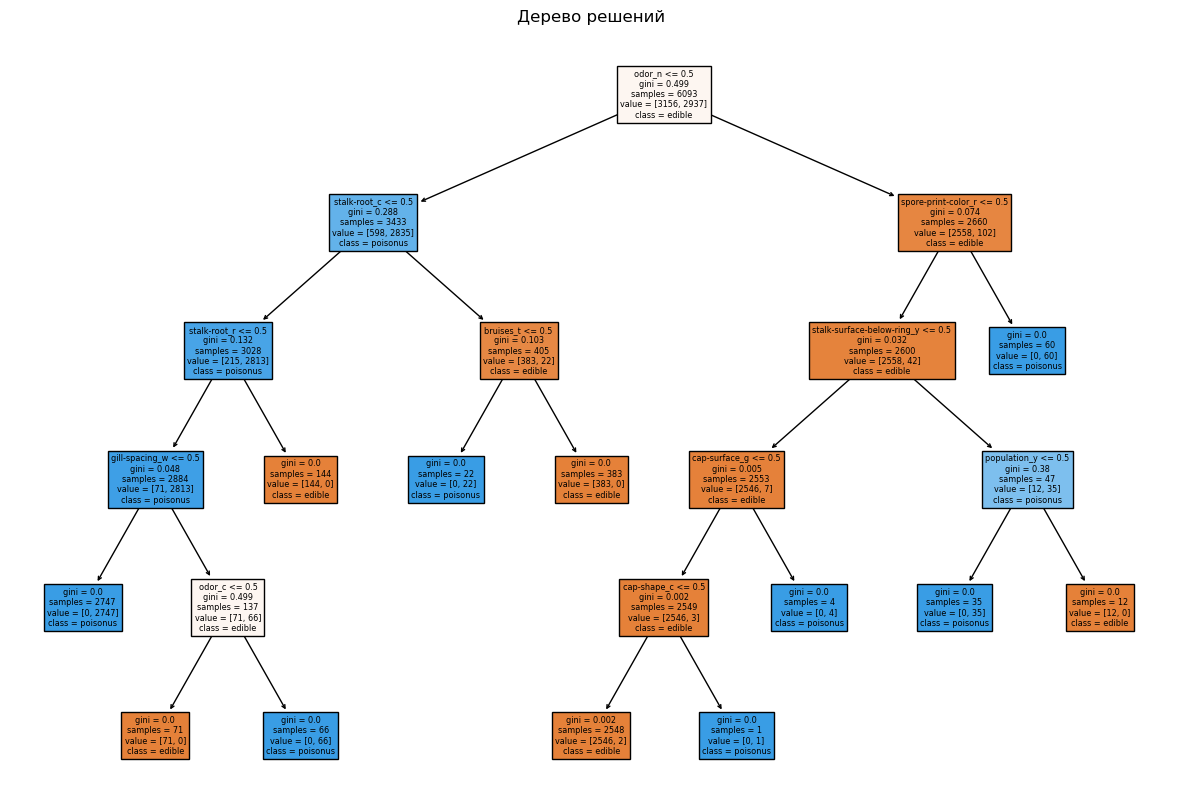

In [82]:
plt.figure(figsize=(15,10))
plot_tree(dt_model, filled=True, class_names=['edible', 'poisonus'], feature_names=list(X_train.columns))
plt.title('Дерево решений')
plt.show()